In [5]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('TSLA AAPL', start = '2010-01-01', end='2023-06-30')

    return(raw
            .iloc[:, ::2]
            .pipe(fix_cols)       
    )

aapl = tweak_data()

[*********************100%***********************]  2 of 2 completed


# Plotting Returns

<Axes: xlabel='Date'>

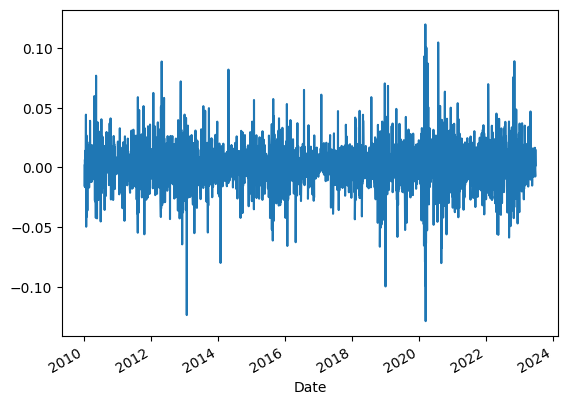

In [6]:
#Plot Returns

(aapl
 .pct_change()
 .Close
 .plot()
)

<Axes: >

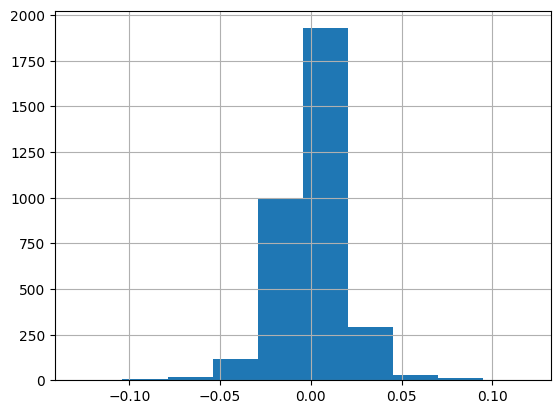

In [7]:
#Histogram of Returns

(aapl
 .pct_change()
 .Close
 .hist()
)

<Axes: >

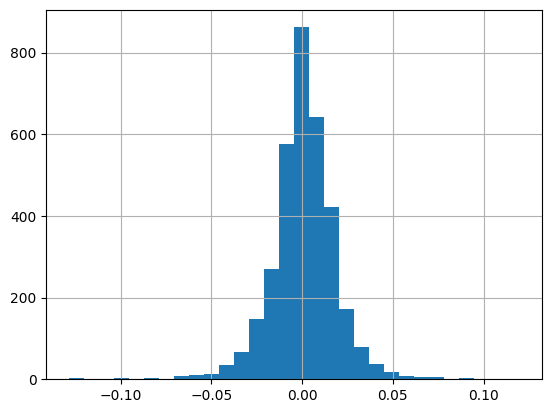

In [8]:
# Change bins
(aapl
 .pct_change()
 .Close
 .hist(bins=30)
)

#### Understanding plotting in Pandas is a huge Lever

## Bar Plot Returns

<Axes: xlabel='Date'>

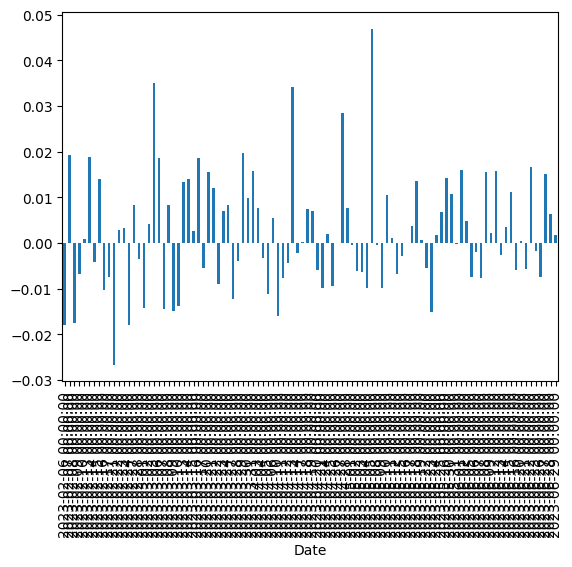

In [9]:
(aapl
 .pct_change()
 .Close
 .iloc[-100:] #selects last 100 entries
 .plot.bar()
)

### Bar Plot of Returns

Sadly, the dates are broken with Pandas bar plots

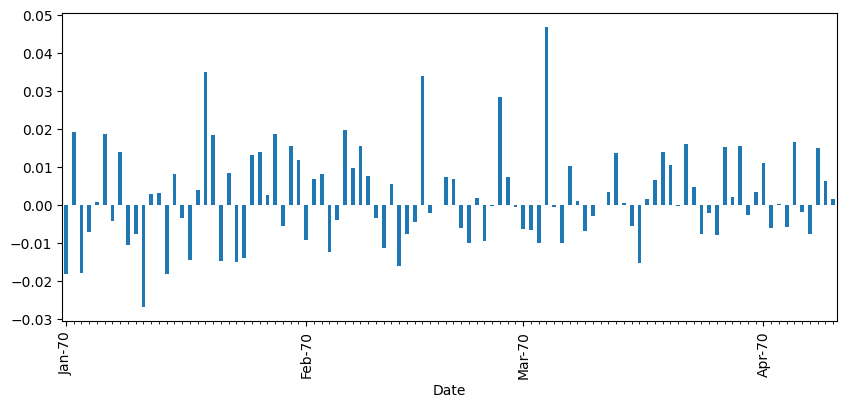

In [14]:
import matplotlib.pyplot as plt
from matplotlib import dates

fig, ax = plt.subplots(figsize = (10,4))
(aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .plot.bar(ax=ax)
 )

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator())